## Import Libraries

In [79]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

## Connect SQLite
There are **two ways** to connect SQLite and run queries
* Connect via SQL Magic extension
* Connect via Python sqlite3 function <br/>

NOTE: The database `sfbike.sqlite` is not available in this repo because it is too big. To download the database please visit: https://www.kaggle.com/benhamner/sf-bay-area-bike-share

### SQL Magic exension

In [2]:
%load_ext sql

In [11]:
%sql sqlite:///db/sfbike.sqlite

Check the available table in the database<br/>
<em>Cannot insert command in the cell below (syntax error will occur)</em>

In [16]:
%%sql 
SELECT * FROM sqlite_master WHERE type='table'

* sqlite:///db/sfbike.sqlite
   sqlite:///db/trackdb.sqlite
Done.


type,name,tbl_name,rootpage,sql
table,station,station,2,"CREATE TABLE station ( id INTEGER PRIMARY KEY, name TEXT, lat NUMERIC, long NUMERIC, dock_count INTEGER, city TEXT, installation_date TEXT)"
table,status,status,3,"CREATE TABLE status ( station_id INTEGER, bikes_available INTEGER, docks_available INTEGER, time TEXT)"
table,trip,trip,4,"CREATE TABLE trip ( id INTEGER PRIMARY KEY, duration INTEGER, start_date TEXT, start_station_name TEXT, -- this should be removed start_station_id INTEGER, end_date TEXT, end_station_name TEXT, -- this should be removed end_station_id INTEGER, bike_id INTEGER, subscription_type TEXT, zip_code INTEGER)"
table,weather,weather,5,"CREATE TABLE weather ( date TEXT, max_temperature_f INTEGER, mean_temperature_f INTEGER, min_temperature_f INTEGER, max_dew_point_f INTEGER, mean_dew_point_f INTEGER, min_dew_point_f INTEGER, max_humidity INTEGER, mean_humidity INTEGER, min_humidity INTEGER, max_sea_level_pressure_inches NUMERIC, mean_sea_level_pressure_inches NUMERIC, min_sea_level_pressure_inches NUMERIC, max_visibility_miles INTEGER, mean_visibility_miles INTEGER, min_visibility_miles INTEGER, max_wind_Speed_mph INTEGER, mean_wind_speed_mph INTEGER, max_gust_speed_mph INTEGER, precipitation_inches INTEGER, cloud_cover INTEGER, events TEXT, wind_dir_degrees INTEGER, zip_code INTEGER)"


### SQLite3 function

In [19]:
db = sqlite3.connect('db/sfbike.sqlite')

def run_query(query):
    return pd.read_sql_query(query, db)

In [26]:
query ='SELECT * FROM sqlite_master WHERE type="table"'
run_query(query)

,type,name,tbl_name,rootpage,sql
0,table,station,station,2,CREATE TABLE station (\n id INTEGER PRIMARY...
1,table,status,status,3,"CREATE TABLE status (\n station_id INTEGER,..."
2,table,trip,trip,4,CREATE TABLE trip (\n id INTEGER PRIMARY KE...
3,table,weather,weather,5,"CREATE TABLE weather (\n date TEXT,\n ma..."


The result shows there are four tables in this database which are `station`, `status`, `trip`, and `weather`.<br/>
Some simple analysis will be performed through SQL to answer the following questions: <br/>
1. What was the trip with the longest duration? <br/>
2. Do unregistered users take longer or shorter trips? <br/>
3. Which stations are the most popular? <br/>
4. Which routes are the most popular?  <br/>

## Explore Tables
From now onwards we will use `SQLite3` function as the output is more simple to look at.

In [32]:
# Check the table to work with
query = 'SELECT name FROM sqlite_master'
run_query(query)

,name
0,station
1,status
2,trip
3,weather


In [34]:
# Check station table
query = 'SELECT * FROM station LIMIT 5'
run_query(query)

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [35]:
# Check status table
query = 'SELECT * FROM status LIMIT 5'
run_query(query)

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


In [36]:
# Check trip table
query = 'SELECT * FROM trip LIMIT 5'
run_query(query)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4069,174,8/29/2013 9:08,2nd at South Park,64,8/29/2013 9:11,2nd at South Park,64,288,Subscriber,94114
1,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703
2,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115
3,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122
4,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597


In [37]:
# Check weather table
query = 'SELECT * FROM weather LIMIT 5'
run_query(query)

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74,68,61,61,58,56,93,75,57,...,10,10,23,11,28,0,4,,286,94107
1,8/30/2013,78,69,60,61,58,56,90,70,50,...,10,7,29,13,35,0,2,,291,94107
2,8/31/2013,71,64,57,57,56,54,93,75,57,...,10,10,26,15,31,0,4,,284,94107
3,9/1/2013,74,66,58,60,56,53,87,68,49,...,10,10,25,13,29,0,4,,284,94107
4,9/2/2013,75,69,62,61,60,58,93,77,61,...,10,6,23,12,30,0,6,,277,94107


In [56]:
# Check how many records in trip table
query = "SELECT COUNT(*) AS \'Total Records' FROM trip"
run_query(query)

,Total Records
0,669959


## Q1: What was the trip with the longest duration?

In [38]:
query = 'SELECT * FROM trip ORDER BY duration DESC LIMIT 1'
run_query(query)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531


In [49]:
query = 'SELECT max(duration)/60/60/24/30 AS MONTH FROM trip'
run_query(query)

,MONTH
0,6


Result shows the longest trip duration is 17270400 seconds and the `bike_id` is 535. This number is ridiculously high which is about six months. It is very likely that this could have been a glitch. Pulling up the top 10 longest rides will hopefully provide some context as to whether this datapoint is a fluke.

In [39]:
query = 'SELECT * FROM trip ORDER BY duration DESC LIMIT 10'
run_query(query)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
1,825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
2,750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
3,841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
4,111309,722236,11/30/2013 13:29,University and Emerson,35,12/8/2013 22:06,University and Emerson,35,247,Customer,94301
5,522337,720454,10/30/2014 8:29,Redwood City Caltrain Station,22,11/7/2014 15:36,Stanford in Redwood City,25,692,Customer,94010
6,323594,716480,6/13/2014 16:57,Harry Bridges Plaza (Ferry Building),50,6/21/2014 23:59,Civic Center BART (7th at Market),72,633,Subscriber,94131
7,361321,715339,7/13/2014 5:50,Arena Green / SAP Center,14,7/21/2014 12:32,Adobe on Almaden,5,251,Customer,nil
8,774999,688899,5/20/2015 15:27,Palo Alto Caltrain Station,34,5/28/2015 14:49,California Ave Caltrain Station,36,230,Customer,nil
9,635260,655939,2/8/2015 3:05,San Jose Civic Center,3,2/15/2015 17:17,SJSU 4th at San Carlos,12,132,Customer,89451


Other bikes have also been occupied for relatively long duration but not as high as bike 535. Lets see if how common it is for a ride to go over 24 hours.

In [73]:
query = 'SELECT COUNT(*) AS \"Long Trip" FROM trip WHERE duration >= 60*60*24'
run_query(query)

,Long Trip
0,296


It reveals that out of bikes there are only 296 bikes have ride over 24 hours.

## Q2: Do unregistered users take longer or shorter trips?

From the top 10 longest duration result we can see that two of the 10 longest trips were made by unsubscribed customers. Let's see if unregistered customers are the main culprits.

In [76]:
query = 'SELECT subscription_type, COUNT(*) AS COUNT FROM trip GROUP BY subscription_type'
run_query(query)

,subscription_type,COUNT
0,Customer,103213
1,Subscriber,566746


It appears that about 1/5 of the customers are non-subscribers. We can also plot the outcomes to make it easier to visualize.

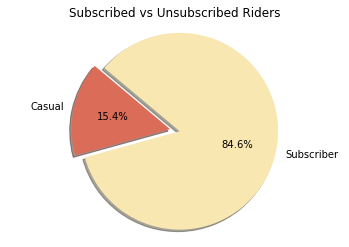

In [82]:
df = pd.read_sql_query(query, db)

labels = ['Casual', 'Subscriber']
sizes = df['COUNT']
colors = ['#DB6C57', '#F9E7B1']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('Subscribed vs Unsubscribed Riders')
plt.axis('equal')
plt.show()